In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
# Load the Excel file
df = pd.read_excel('../data/DSD_PTD_R17_DYT16_Web.xlsx', sheet_name= 'Spending Utilization YTD 2016', skiprows = 3)

In [14]:
# Data cleaning on manufacturer, spending and beneficiaries
df['Total Spending Cleaned'] = df['Total Spending'].replace('  ', 0).replace(np.NaN, 0).astype(float)
df['Total Beneficiaries Cleaned'] = df['Total Beneficiaries'].replace('  ', 0).replace(np.NaN, 0).astype(float)
df['Manufacturer Count'] = np.where(df['Number of Manufacturers'] > 1, 'Multiple Manufacturers', 'Single Manufacturer')

C:\Users\brett\AppData\Local\Temp\ipykernel_23356\1149184211.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Total Spending Cleaned'] = df['Total Spending'].replace('  ', 0).replace(np.NaN, 0).astype(float)
C:\Users\brett\AppData\Local\Temp\ipykernel_23356\1149184211.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Total Beneficiaries Cleaned'] = df['Total Beneficiaries'].replace('  ', 0).replace(np.NaN, 0).astype(float)


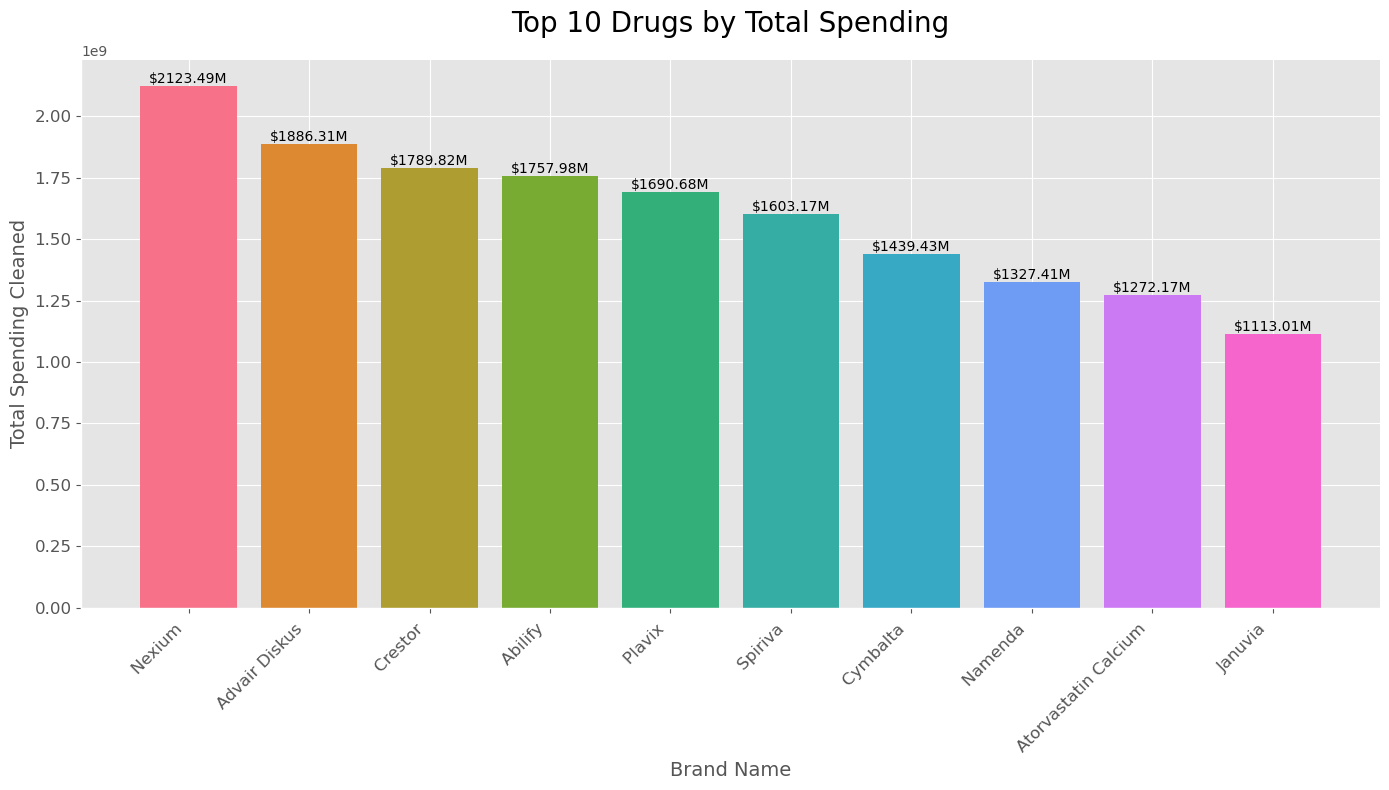

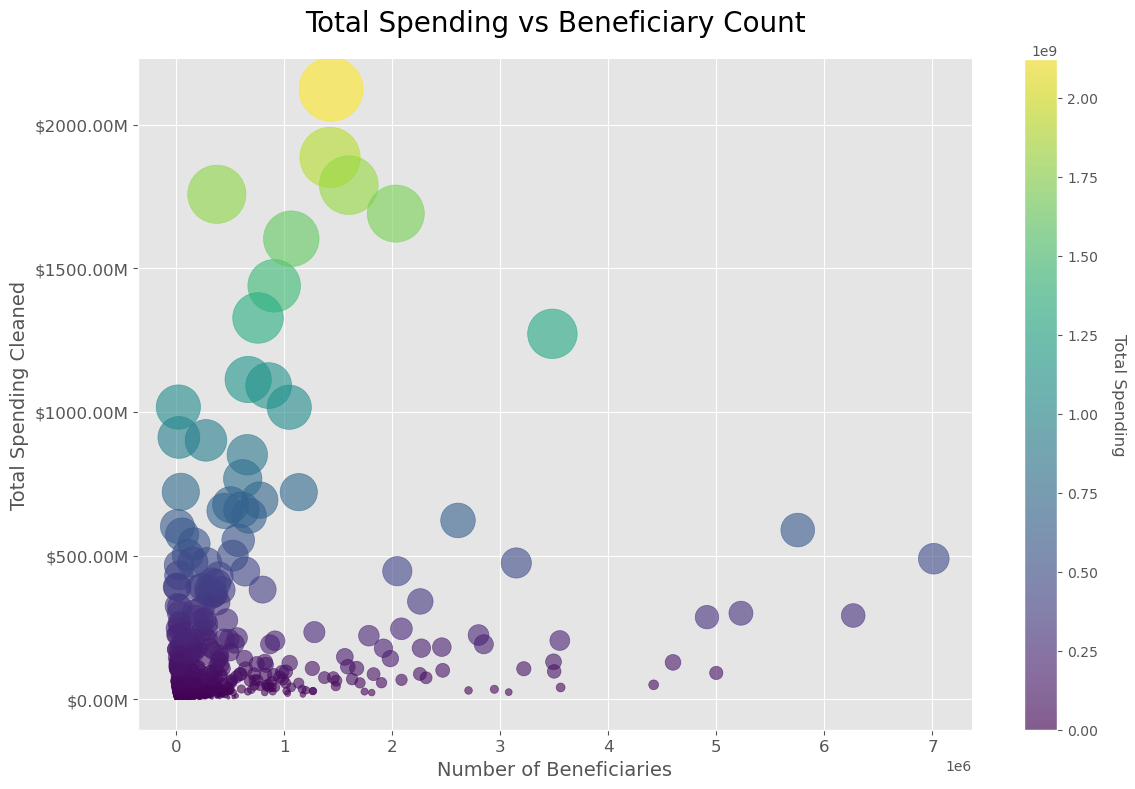

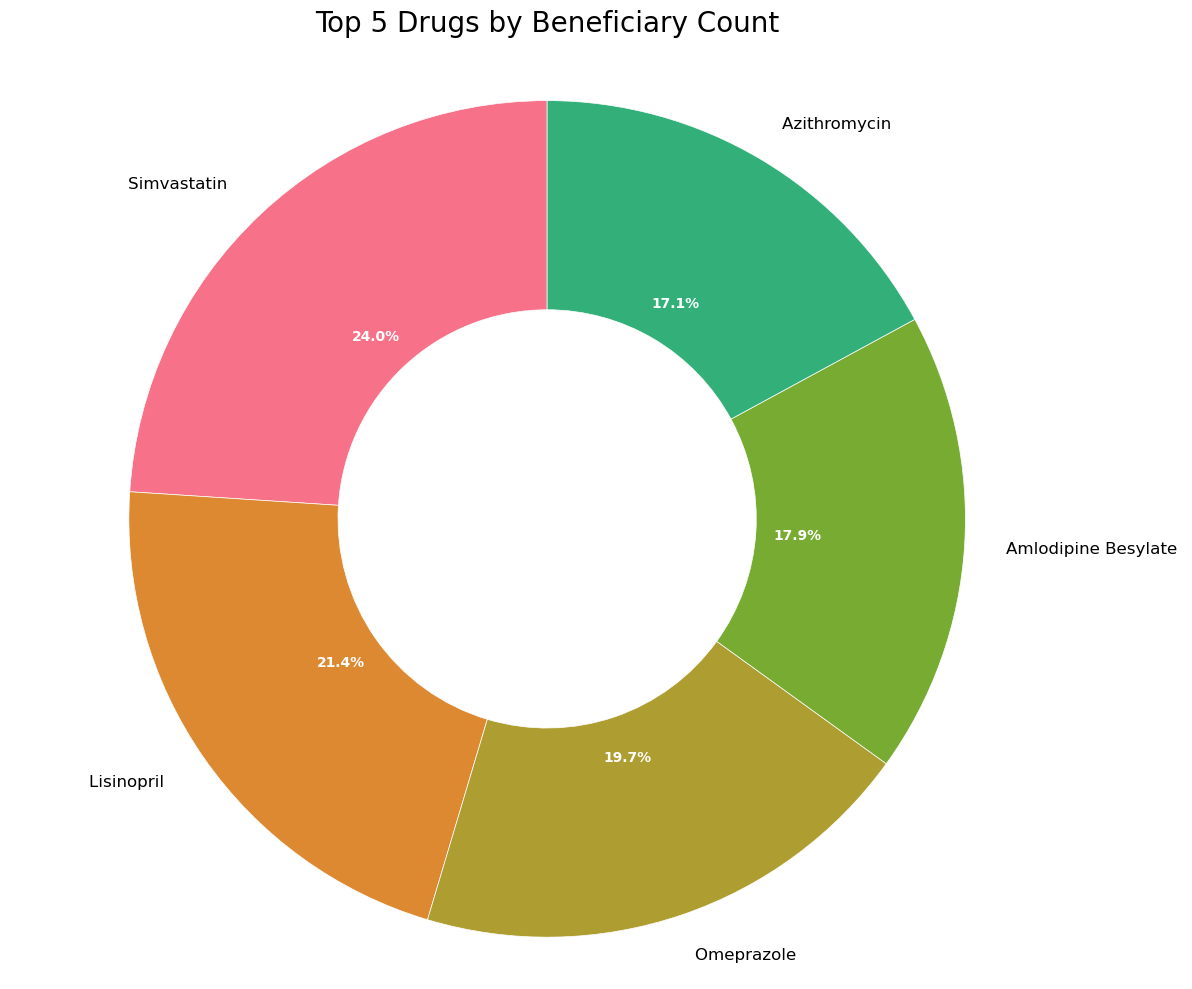

C:\Users\brett\AppData\Local\Temp\ipykernel_23356\2231461936.py:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Manufacturer Count', y='Total Spending Cleaned', data=df, palette='Set3', ax=ax)


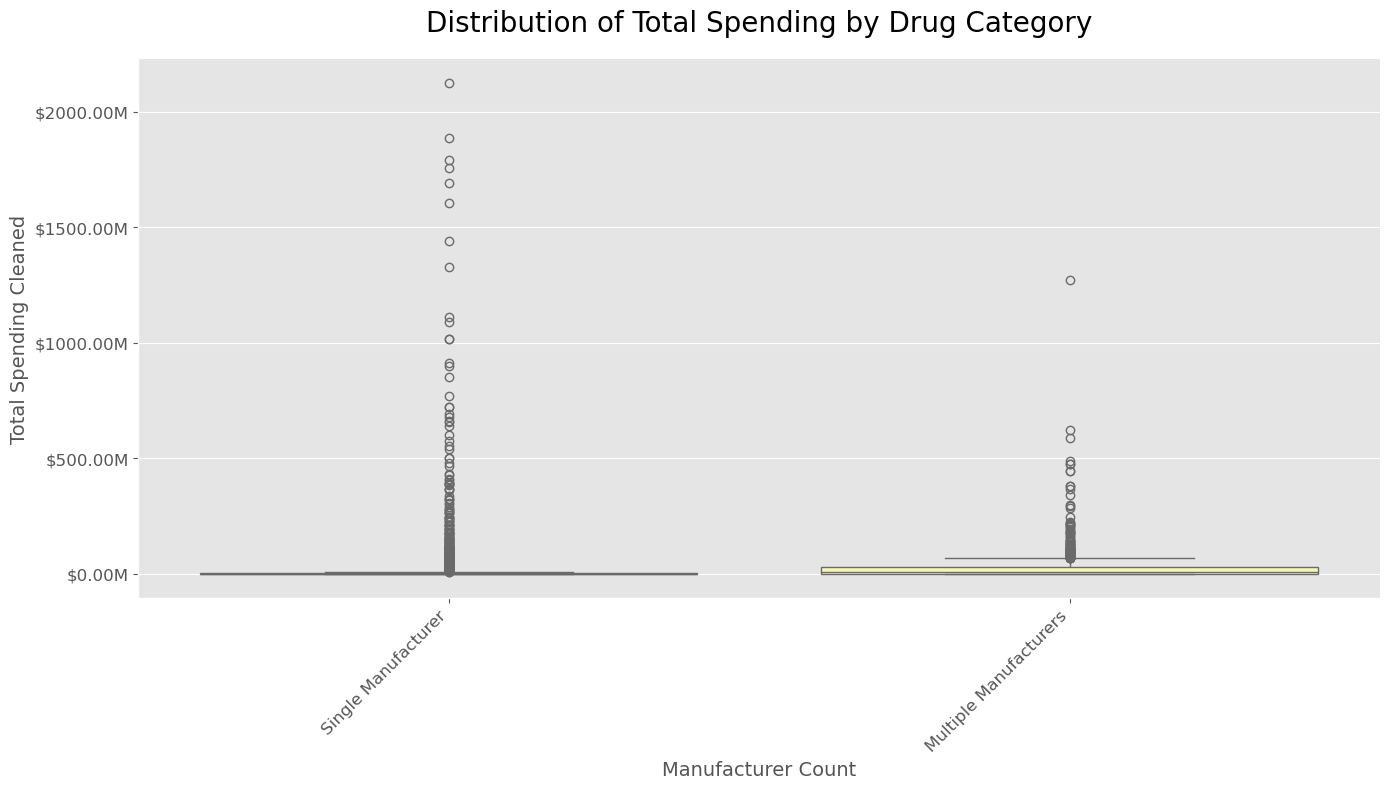

In [16]:
# Function to format spending as $X.XXM
def format_spending(value):
    return f'${value/1e6:.2f}M'

# Apply formatting to 'Total Spending' column
df['Total Spending Formatted'] = df['Total Spending Cleaned'].apply(format_spending)

# Set a consistent style for all plots
plt.style.use('ggplot')
colors = sns.color_palette("husl", 10)

# Custom function to set common style elements
def set_common_style(ax, title, xlabel, ylabel):
    ax.set_title(title, fontsize=20, pad=20)
    ax.set_xlabel(xlabel, fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.tick_params(axis='both', which='major', labelsize=12)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Example 1: Bar plot of top 10 drugs by total spending
top_10_drugs = df.nlargest(10, 'Total Spending Cleaned')
fig, ax = plt.subplots(figsize=(14, 8))
bars = ax.bar(top_10_drugs['Brand Name'], top_10_drugs['Total Spending Cleaned'], color=colors)
set_common_style(ax, 'Top 10 Drugs by Total Spending', 'Brand Name', 'Total Spending Cleaned')
plt.xticks(rotation=45, ha='right')

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            format_spending(height),
            ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# Example 2: Scatter plot of Total Spending vs Beneficiary Count
fig, ax = plt.subplots(figsize=(12, 8))
scatter = ax.scatter(df['Total Beneficiaries Cleaned'], df['Total Spending Cleaned'], 
                     alpha=0.6, s=df['Total Spending Cleaned']/1e6, c=df['Total Spending Cleaned'], 
                     cmap='viridis')
set_common_style(ax, 'Total Spending vs Beneficiary Count', 'Number of Beneficiaries', 'Total Spending Cleaned')

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Total Spending', rotation=270, labelpad=20)

# Format y-axis labels
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format_spending(x)))

plt.tight_layout()
plt.show()

# Example 3: Pie chart of top 5 drugs by beneficiary count
top_5_beneficiaries = df.nlargest(5, 'Total Beneficiaries Cleaned')
fig, ax = plt.subplots(figsize=(12, 10))
wedges, texts, autotexts = ax.pie(top_5_beneficiaries['Total Beneficiaries Cleaned'], 
                                  labels=top_5_beneficiaries['Brand Name'], 
                                  autopct='%1.1f%%', startangle=90, colors=colors,
                                  wedgeprops=dict(width=0.5, edgecolor='white'))
ax.set_title('Top 5 Drugs by Beneficiary Count', fontsize=20, pad=20)

# Make the percentage labels easier to read
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

plt.setp(texts, fontsize=12)
ax.axis('equal')
plt.tight_layout()
plt.show()

# Example 4: Box plot of spending distribution by drug category
fig, ax = plt.subplots(figsize=(14, 8))
sns.boxplot(x='Manufacturer Count', y='Total Spending Cleaned', data=df, palette='Set3', ax=ax)
set_common_style(ax, 'Distribution of Total Spending by Drug Category', 'Manufacturer Count', 'Total Spending Cleaned')
plt.xticks(rotation=45, ha='right')

# Format y-axis labels
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: format_spending(x)))

plt.tight_layout()
plt.show()